In [ ]:
# Importing all necessary liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Loading Dataset**

In [ ]:
runkeeper_file=pd.read_csv(r"/content/cardioActivities.csv")

In [ ]:
# Create DataFrame
df_activity =pd.DataFrame(runkeeper_file)

In [ ]:
df_activity.head(3)

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx


In [ ]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      508 non-null    object 
 1   Activity Id               508 non-null    object 
 2   Type                      508 non-null    object 
 3   Route Name                1 non-null      object 
 4   Distance (km)             508 non-null    float64
 5   Duration                  508 non-null    object 
 6   Average Pace              508 non-null    object 
 7   Average Speed (km/h)      508 non-null    float64
 8   Calories Burned           508 non-null    float64
 9   Climb (m)                 508 non-null    int64  
 10  Average Heart Rate (bpm)  294 non-null    float64
 11  Friend's Tagged           0 non-null      float64
 12  Notes                     231 non-null    object 
 13  GPX File                  504 non-null    object 
dtypes: float64

In [ ]:
df_activity.shape

(508, 14)

In [ ]:
df_activity.isnull().sum()

Date                          0
Activity Id                   0
Type                          0
Route Name                  507
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
Friend's Tagged             508
Notes                       277
GPX File                      4
dtype: int64

## 2. Data preprocessing
<li>Remove columns not useful for our analysis.</li>
<li>Replace the "Other" activity type to "Unicycling" because that was always the "Other" activity.</li>
<li>Count missing values.</li>
</ul>

In [ ]:
#Removing unnecessary  columns
df_activity.drop(['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes'],axis=1)

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
0,2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
1,2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2,2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
3,2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
4,2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0
...,...,...,...,...,...,...,...,...
503,2012-08-28 07:06:57,Walking,1.57,13:39,8:41,6.91,7,NaN
504,2012-08-24 12:59:42,Walking,1.48,17:56,12:09,4.94,12,NaN
505,2012-08-24 10:12:16,Walking,1.49,13:43,9:14,6.49,9,NaN
506,2012-08-24 08:13:12,Running,3.15,16:00,5:05,11.82,17,NaN


In [ ]:
df_activity.value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
# Rename 'Other' type to 'Unicycling'
df_activity.replace('Other','Unicycling')

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2012-08-28 07:06:57,f5218490-a372-44c8-bb20-de3b91984cbe,Walking,NaN,1.57,13:39,8:41,6.91,926743.0,7,NaN,NaN,NaN,2012-08-28-070657.gpx
504,2012-08-24 12:59:42,018f66a7-da5e-4985-a8fe-725a33317c87,Walking,NaN,1.48,17:56,12:09,4.94,942192.0,12,NaN,NaN,NaN,2012-08-24-125942.gpx
505,2012-08-24 10:12:16,7acec95a-d63d-435d-837c-7befb352f500,Walking,NaN,1.49,13:43,9:14,6.49,924486.0,9,NaN,NaN,NaN,2012-08-24-101216.gpx
506,2012-08-24 08:13:12,f790bdb2-b921-4018-bd39-d59d870c5847,Running,NaN,3.15,16:00,5:05,11.82,2288868.0,17,NaN,NaN,NaN,2012-08-24-081312.gpx


In [ ]:
df_activity.isnull().sum()

Date                          0
Activity Id                   0
Type                          0
Route Name                  507
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
Friend's Tagged             508
Notes                       277
GPX File                      4
dtype: int64

## 3. Dealing with missing values
<p>As we can see from the last output, there are 214 missing entries for my average heart rate.</p>
<p>We can't go back in time to get those data, but we can fill in the missing values with an average value. This process is called <em>mean imputation</em>. When imputing the mean to fill in missing data, we need to consider that the average heart rate varies for different activities (e.g., walking vs. running). We'll filter the DataFrames by activity type (<code>Type</code>) and calculate each activity's mean heart rate, then fill in the missing values with those means.</p>

In [ ]:
# Calculate sample means for heart rate for each training activity type
avg_hr_run = df_activity[df_activity['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activity[df_activity['Type']=='Cycling']['Average Heart Rate (bpm)'].mean()
avg_hr_run = df_activity[df_activity['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
print('Average Heart Rate (bpm)',avg_hr_cycle)

Average Heart Rate (bpm) 124.4


In [ ]:
# Split whole DataFrame into several, specific for different activities
df_run = df_activity[df_activity['Type'] == 'Running'].copy()
df_cycle =df_activity[df_activity['Type'] == 'Cycling'].copy()
df_walk = df_activity[df_activity['Type'] == 'Walking'].copy()

In [ ]:
# Filling missing values with counted means
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)

In [ ]:
df_run.isnull().sum()

Date                          0
Activity Id                   0
Type                          0
Route Name                  458
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)      0
Friend's Tagged             459
Notes                       237
GPX File                      4
dtype: int64

## 4. Plot running data
<p>Now we can create our first plot! As we found earlier, most of the activities in my data were running (459 of them to be exact). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively. So for now, let's focus on plotting the different running metrics.</p>
<p>An excellent first visualization is a figure with four subplots, one for each running metric (each numerical column). Each subplot will have a different y-axis, which is explained in each legend. The x-axis, <code>Date</code>, is shared among all subplots.</p>

In [ ]:
# Import matplotlib, set style and ignore warning
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)


In [ ]:
# Prepare data subsetting period from 2013 till 2018
runs_subset_2013_2018 = df_run

In [ ]:
df_activity = pd.date_range(start='2013-01-01', end='2018-12-31', freq='D')
n = len('GPX File')

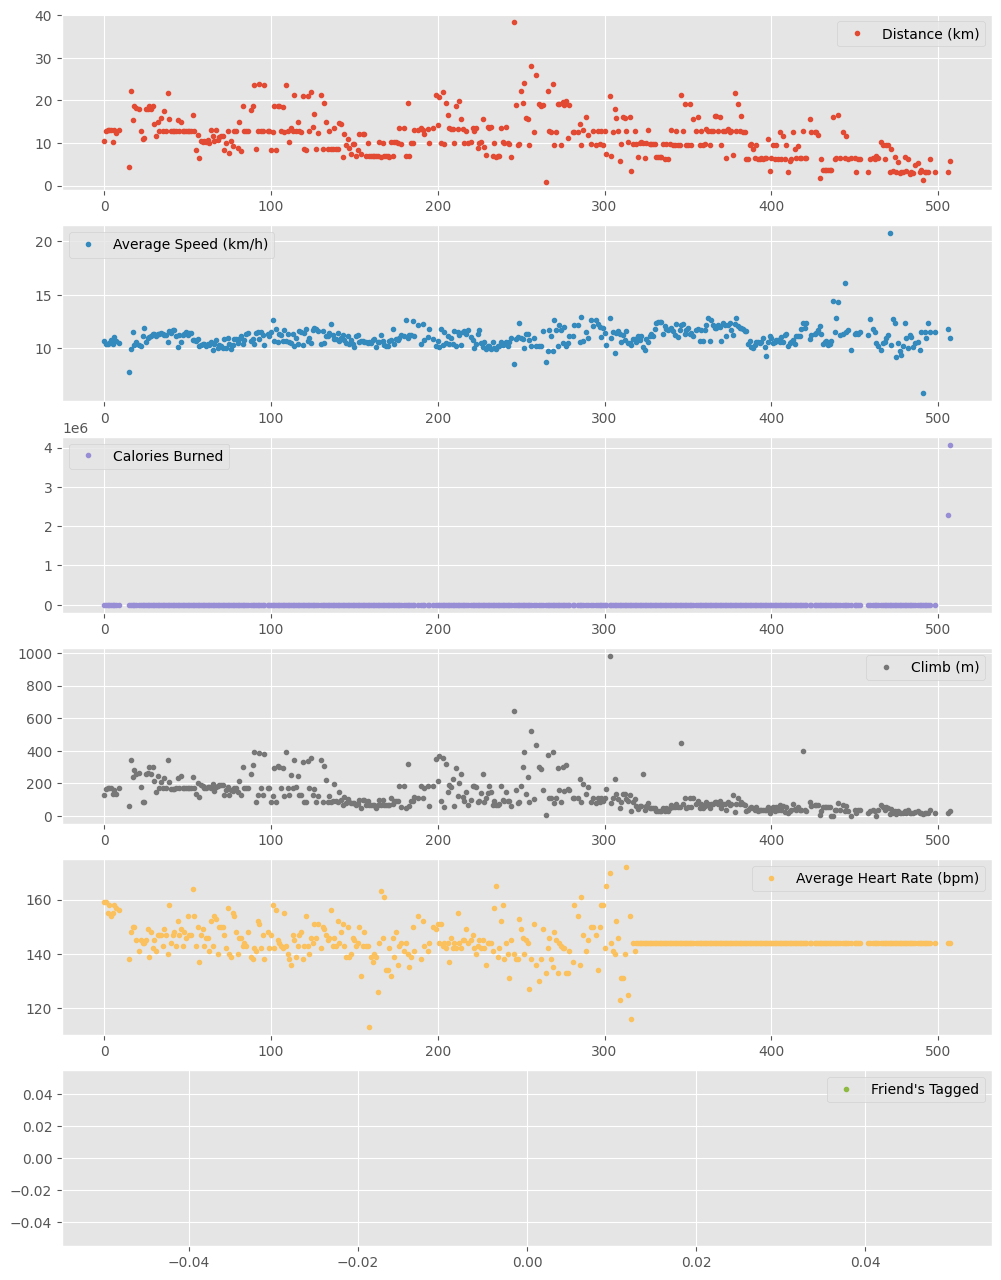

In [ ]:
# Create, plot and customize in one step
runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3,
                          )

plt.show()

## 5. Running statistics
<p>No doubt, running helps people stay mentally and physically healthy and productive at any age. And it is great fun! When runners talk to each other about their hobby, we not only discuss our results, but we also discuss different training strategies. </p>
<p>You'll know you're with a group of runners if you commonly hear questions like:</p>
<ul>
<li>What is your average distance?</li>
<li>How fast do you run?</li>
<li>Do you measure your heart rate?</li>
<li>How often do you train?</li>
</ul>


In [ ]:
df_run.index = pd.to_datetime(df_run.index)

In [ ]:
# Prepare running data for the last 4 years
runs_subset_2015_2018 = df_run['2015':'2018']

In [ ]:
# Calculate annual statistics
annual_means = runs_subset_2015_2018.resample('A').mean()
print('How my average run looks in last 4 years:',annual_means)

How my average run looks in last 4 years: Empty DataFrame
Columns: [Date, Activity Id, Type, Route Name, Distance (km), Duration, Average Pace, Average Speed (km/h), Calories Burned, Climb (m), Average Heart Rate (bpm), Friend's Tagged, Notes, GPX File]
Index: []


In [ ]:
# Calculate weekly statistics
weekly_means = runs_subset_2015_2018.resample('W').mean()
print('Weekly averages of last 4 years:',weekly_means)

Weekly averages of last 4 years: Empty DataFrame
Columns: [Date, Activity Id, Type, Route Name, Distance (km), Duration, Average Pace, Average Speed (km/h), Calories Burned, Climb (m), Average Heart Rate (bpm), Friend's Tagged, Notes, GPX File]
Index: []


In [ ]:
# Calculate the mean of weekly counts
weekly_counts = df_run.resample('W').count()
weekly_counts_average = weekly_counts.mean()
print('How many trainings per week I had on average:', weekly_counts_average)

How many trainings per week I had on average: Date                        459.0
Activity Id                 459.0
Type                        459.0
Route Name                    1.0
Distance (km)               459.0
Duration                    459.0
Average Pace                459.0
Average Speed (km/h)        459.0
Calories Burned             459.0
Climb (m)                   459.0
Average Heart Rate (bpm)    459.0
Friend's Tagged               0.0
Notes                       222.0
GPX File                    455.0
dtype: float64


## 6. Visualization with averages
<p>Let's plot the long term averages of my distance run and my heart rate with their raw data to visually compare the averages to each training session. Again, we'll use the data from 2015 through 2018.</p>


In [ ]:
# Prepare data
runs_subset_2015_2018 = df_run[2018:2015]
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

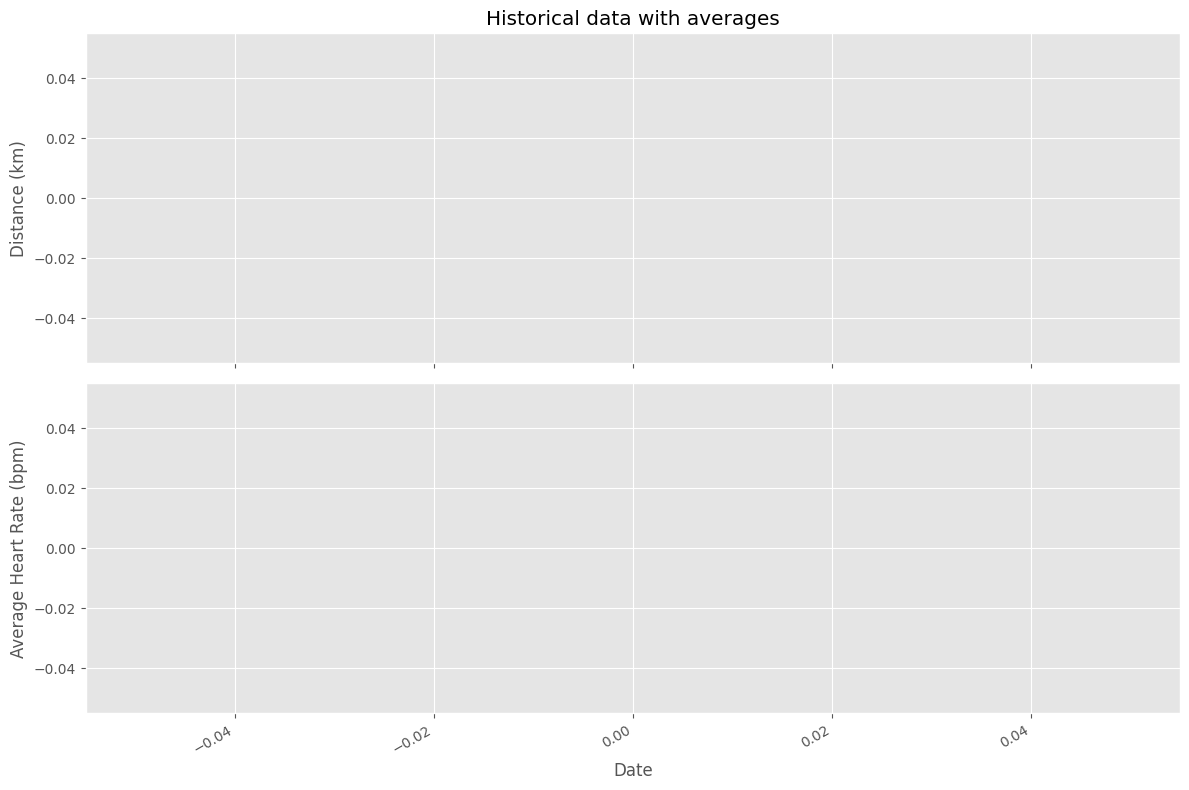

In [111]:
# Create plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

# Plot and customize first subplot
# Plot and customize first subplot (Distance)
runs_distance.plot(ax=ax1, color='green')
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='Blue', linewidth=1, linestyle='-.')

# Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')

# Add horizontal line for average Heart Rate
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')

# Show plot
plt.tight_layout()
plt.show()


## 7. Did I reach my goals?
<p>To motivate myself to run regularly, I set a target goal of running 1000 km per year. Let's visualize my annual running distance (km) from 2013 through 2018 to see if I reached my goal each year. Only stars in the green region indicate success.</p>

In [ ]:
# Convert 'Date' to datetime format if needed
df_run['Date'] = pd.to_datetime(df_run['Date'])

# Subset data for years 2013-2018 and compute annual sums
df_run_subset = df_run[(df_run['Date'].dt.year >= 2013) & (df_run['Date'].dt.year <= 2018)]
df_run_dist_annual = df_run_subset['Distance (km)'].resample('Y').sum()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


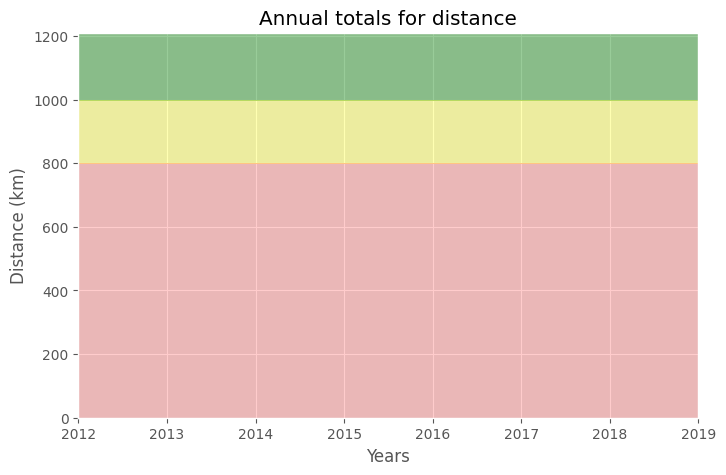

In [ ]:
# Create plot
fig = plt.figure(figsize=(8.0,5.0))

# Plot and customize
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210],
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)

plt.show()

## 8. Am I progressing?
<p>Let's dive a little deeper into the data to answer a tricky question: am I progressing in terms of my running skills? </p>
<p>To answer this question, we'll decompose my weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run.</p>
<p>We are going to use <code>statsmodels</code> library to decompose the weekly trend.</p>

In [ ]:
import statsmodels.api as sm

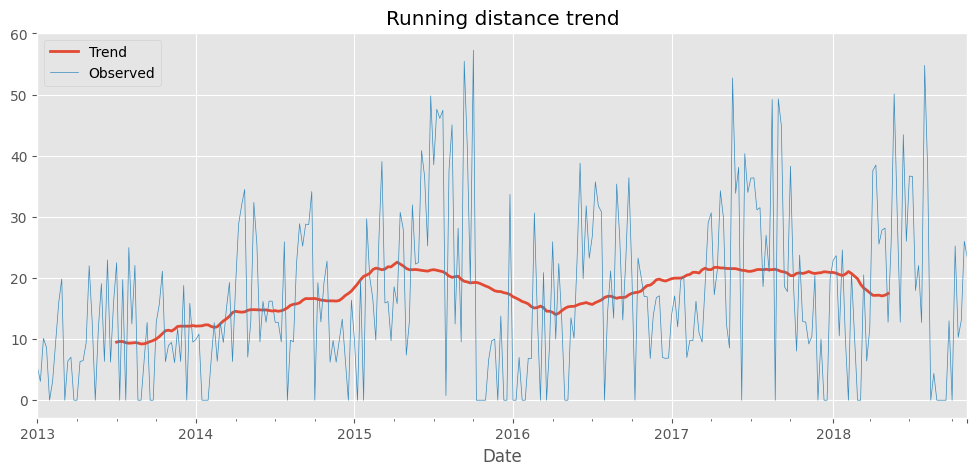

In [ ]:
df_run_subset = df_run[(df_run['Date'].dt.year >= 2013) & (df_run['Date'].dt.year <= 2018)]

# Select Distance column
df_run_dist = df_run_subset.set_index('Date')['Distance (km)']

# Resample weekly and fill NaN values
df_run_dist_wkly = df_run_dist.resample('W').sum().fillna(method='bfill')
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, period =52)

# Create plot
fig = plt.figure(figsize=(12,5))

# Plot and customize
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()



## 9. Training intensity
<p>Heart rate is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.</p>
<p>We'll create a distribution plot of  heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones. </p>

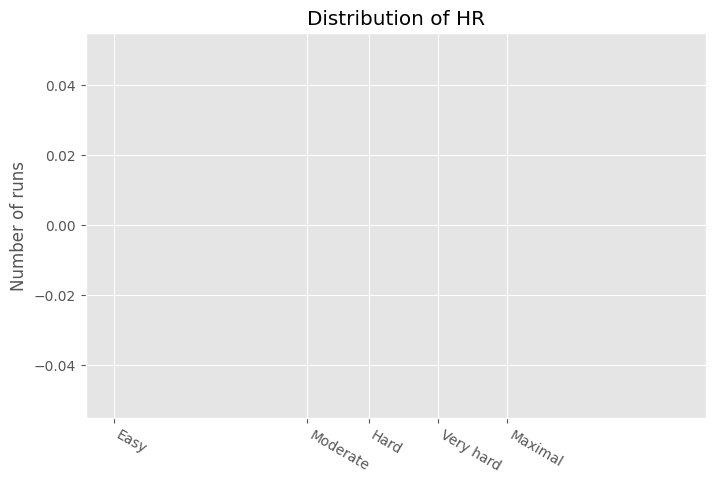

In [118]:
# Prepare data
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']

# Assuming df_run is your original DataFrame containing datetime index and 'Average Heart Rate (bpm)' column
df_run_hr_all = df_run['2015-03':'2018']['Average Heart Rate (bpm)']

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot and customize histogram
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)

# Customizing histogram bins colors based on zones
for i in range(len(patches)):
    patches[i].set_facecolor(zone_colors[i])

# Customizing x-axis ticks
ax.set_xticks(hr_zones[:-1])
ax.set_xticklabels(zone_names, rotation=-30, ha='left')

# Adding titles and labels
ax.set(title='Distribution of HR', ylabel='Number of runs')

# Show plot
plt.show()


## 10. Detailed summary report
<p>With all this data cleaning, analysis, and visualization, let's create detailed summary tables of my training. </p>
<p>To do this, we'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.</p>

In [ ]:
#Concatenate the three DataFrames
df_run_walk_cycle = pd.concat([df_run, df_walk, df_cycle])
df_run_walk_cycle.reset_index(drop=True, inplace=True)

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)

# Calculating summary statistics for each type of activities
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print('Summary statistics for different training types:')
display(df_summary.stack())

Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Average Speed (km/h)     Climb (m)  Distance (km)
Type                                                            
Cycling 25%               16.980000    139.000000      15.530000
        50%               19.500000    199.000000      20.300000
        75%               21.490000    318.000000      29.400000
        count             29.000000     29.000000      29.000000
        max               24.330000    553.000000      49.180000
        mean              19.125172    240.551724      23.468276
        min               11.380000     58.000000      11.410000
        std                3.257100    128.960289       9.451040
        total                   NaN   6976.000000     680.580000
Running 25%               10.495000     54.000000       7.415000
        50%               10.980000     91.000000      10.810000
        75%               11.520000    171.000000      13.190000
        count            459.000000    459.000000     459.000000
        max               20.720000    982.000000      38.320000
        mean              11.056296    124.788671      11.382353
        min                5.770000      0.000000       0.760000
        std                0.953273    103.382177       4.937853
        total                   NaN  57278.000000    5224.500000
Walking 25%                5.555000      7.000000       1.385000
        50%                5.970000     10.000000       1.485000
        75%                6.512500     15.500000       1.787500
        count             18.000000     18.000000      18.000000
        max                6.910000    112.000000       4.290000
        mean               5.549444     19.388889       1.858333
        min                1.040000      5.000000       1.220000
        std                1.459309     27.110100       0.880055
        total                   NaN    349.000000      33.450000

## 11. Fun facts
<p>These data (my running history) represent 6 years, 2 months and 21 days. running shoes used–7.</p>
<pre><code>FUN FACTS
- Average distance: 11.38 km
- Longest distance: 38.32 km
- Highest climb: 982 m
- Total climb: 57,278 m
- Total number of km run: 5,224 km
- Total runs: 459
- Number of running shoes gone through: 7 pairs
</code></pre>
<p>The story of Forrest Gump is well known–the man, who for no particular reason decided to go for a "little run." His epic run duration was 3 years, 2 months and 14 days (1169 days). In the picture you can see Forrest’s route of 24,700 km.  </p>
<pre><code>FORREST RUN FACTS
- Average distance: 21.13 km
- Total number of km run: 24,700 km
- Total runs: 1169
- Number of running shoes gone through: ...
</code></pre>
<p>Assuming Forest and I go through running shoes at the same rate, figure out how many pairs of shoes Forrest needed for his run.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/Forrest_Gump_running_route.png" alt="Forrest's route" title="Little run of Forrest Gump"></p>

In [ ]:
total_km_instructor = 5224
pairs_of_shoes = 7

total_km_forrest_run = 24700

# Count average shoes per lifetime (as km per pair) using our fun facts
average_shoes_lifetime = total_km_instructor / pairs_of_shoes

# Count number of shoes for Forrest's run distance
shoes_for_forrest_run = total_km_forrest_run // average_shoes_lifetime

print('Forrest Gump would need {} pairs of shoes!'.format(shoes_for_forrest_run))

Forrest Gump would need 33.0 pairs of shoes!
